11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60/60 [==============================] - 8s 55ms/step - loss: 0.9648 - accuracy: 0.7426
Epoch 2

KeyboardInterrupt: ignored

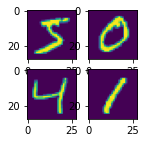

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
from sklearn.metrics import multilabel_confusion_matrix


def plot_confusion_matrix(c_matrix):
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j) / float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center', color='green', size=20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])

    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

fig = plt.figure(figsize=(2, 2))
fig.add_subplot(2, 2, 1)
plt.imshow(x_train[0])
fig.add_subplot(2, 2, 2)
plt.imshow(x_train[1])
fig.add_subplot(2, 2, 3)
plt.imshow(x_train[2])
fig.add_subplot(2, 2, 4)
plt.imshow(x_train[3])


x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")

y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



model.fit(x_train_s, y_train_s, epochs=5, batch_size=1000)


classes = model.predict(x_test_s, batch_size=1000)

classes_s = np.zeros_like(classes)
classes_s[np.arange(len(classes)), classes.argmax(1)] = 1

print(multilabel_confusion_matrix(y_test_s, classes_s))

model.save("model.h5")

modelConv = keras.Sequential()
modelConv.add(layers.Conv2D(28,(3,3), activation='relu', input_shape=input_shape))
modelConv.add(layers.MaxPooling2D((2,2)))
modelConv.add(layers.Conv2D(56,(3,3), activation='relu'))
modelConv.add(layers.MaxPooling2D((2,2,)))
modelConv.add(layers.Flatten())
modelConv.add(layers.Dense(units=64, activation='relu'))
modelConv.add(layers.Dense(units=10, activation='softmax'))
modelConv.summary()



modelConv.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])



modelConv.fit(x_train_s, y_train_s, epochs=5, batch_size=1000)



classes = model.predict(x_test_s, batch_size=1000)

classes_s = np.zeros_like(classes)
classes_s[np.arange(len(classes)),classes.argmax(1)] = 1

print(multilabel_confusion_matrix(y_test_s,classes_s))

modelConv.save("modelConv.h5")